#📌 Extracción

In [2]:
import requests
import pandas as pd

response = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datos = response.json()

telecomX = pd.DataFrame(datos)
telecomX.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
datos_df = pd.json_normalize(datos)
datos_df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

### **Verificación**

In [4]:
datos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

### **Verificación de valores únicos**

In [5]:
for col in datos_df.columns:
    print(col)
    print(datos_df[col].nunique())
    print(datos_df[col].unique())
    print('-'*50)

customerID
7267
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Churn
3
['No' 'Yes' '']
--------------------------------------------------
customer.gender
2
['Female' 'Male']
--------------------------------------------------
customer.SeniorCitizen
2
[0 1]
--------------------------------------------------
customer.Partner
2
['Yes' 'No']
--------------------------------------------------
customer.Dependents
2
['Yes' 'No']
--------------------------------------------------
customer.tenure
73
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
phone.PhoneService
2
['Yes' 'No']
--------------------------------------------------
phone.MultipleLines
3
['No' 'Yes' 'No phone service']
--

### **Verificación de valores duplicados**

In [6]:
datos_df.duplicated().sum()

np.int64(0)

### **Verificación de valores nulos**

In [7]:
datos_df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### **Verificación de valores vacíos o en blanco**

In [8]:
datos_df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


### **Transformación**

##### **Transformando la columna account.Charges.Total a float**

In [9]:
datos_df['account.Charges.Total'] = pd.to_numeric(datos_df['account.Charges.Total'], errors = 'coerce')
datos_df['account.Charges.Total'].dtype

dtype('float64')

In [10]:
datos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

##### **Eliminación de valores vacíos en la columna Churn**

In [11]:
len(datos_df)

7267

In [12]:
datos_df = datos_df[datos_df['Churn'].str.strip() != ""]
len(datos_df)

7043

In [13]:
datos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

##### **Verificación de datos vacíos, blancos y nulos**

---



In [14]:
datos_df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [15]:
datos_df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [16]:
datos_df = datos_df.dropna(subset = ['account.Charges.Total'])
datos_df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [17]:
datos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   object 
 2   customer.gender            7032 non-null   object 
 3   customer.SeniorCitizen     7032 non-null   int64  
 4   customer.Partner           7032 non-null   object 
 5   customer.Dependents        7032 non-null   object 
 6   customer.tenure            7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   object 
 8   phone.MultipleLines        7032 non-null   object 
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   object 
 11  internet.OnlineBackup      7032 non-null   object 
 12  internet.DeviceProtection  7032 non-null   object 
 13  internet.TechSupport       7032 non-null   object 
 1

### **Columna de cuentas diarias**

In [18]:
datos_df['account.Charges.Daily'] = datos_df['account.Charges.Monthly'] / 30
datos_df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,account.Charges.Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


### **Estandarización y transformación de datos**

In [19]:
columnas = {'customerID': 'id',
 'Churn': 'evasión',
 'customer.gender': 'genero',
 'customer.SeniorCitizen': 'tiene_+60',
 'customer.Partner': 'tiene_pareja',
 'customer.Dependents': 'tiene_dependientes',
 'customer.tenure': 'tiempo_contrato_meses',
 'phone.PhoneService': 'servicio_telefono',
 'phone.MultipleLines': 'multiples_lineas',
 'internet.InternetService': 'tipo_internet',
 'internet.OnlineSecurity': 'seguridad_online',
 'internet.OnlineBackup': 'backup_online',
 'internet.DeviceProtection': 'proteccion_dispositivo',
 'internet.TechSupport': 'soporte_tecnico',
 'internet.StreamingTV': 'streaming_TV',
 'internet.StreamingMovies': 'streaming_peliculas',
 'account.Contract': 'tipo_contrato',
 'account.PaperlessBilling': 'factura_digital',
 'account.PaymentMethod': 'metodo_pago',
 'account.Charges.Monthly': 'facturacion_mensual',
 'account.Charges.Total': 'facturacion_total',
 'account.Charges.Daily': 'facturacion_diaria'}

In [20]:
datos_df = datos_df.rename(columns = columnas)
datos_df.head(2)

,id,evasión,genero,tiene_+60,tiene_pareja,tiene_dependientes,tiempo_contrato_meses,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,facturacion_mensual,facturacion_total,facturacion_diaria
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


In [21]:
datos_df['tiene_+60'] = datos_df['tiene_+60'].replace({0: 'No', 1: 'Sí'})
datos_df.head()

,id,evasión,genero,tiene_+60,tiene_pareja,tiene_dependientes,tiempo_contrato_meses,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,facturacion_mensual,facturacion_total,facturacion_diaria
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


In [22]:
datos_df = datos_df.replace({'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono', 'No internet service': 'Sin servicio de internet'})
datos_df.head()

,id,evasión,genero,tiene_+60,tiene_pareja,tiene_dependientes,tiempo_contrato_meses,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,facturacion_mensual,facturacion_total,facturacion_diaria
0,0002-ORFBO,No,Female,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,One year,Sí,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Male,No,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Month-to-month,Sí,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Male,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Month-to-month,Sí,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Female,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Month-to-month,Sí,Mailed check,83.9,267.40,2.796667


In [23]:
datos_df = datos_df.replace({'Female': 'Femenino', 'Male': 'Masculino',
                             'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal',
                             'Mailed check': 'Cheque enviado por correo',
                             'Electronic check': 'Cheque electrónico',
                             'Credit card (automatic)': 'Tarjeta de crédito (automático)',
                             'Bank transfer (automatic)': 'Transferencia bancaria (automático)'})
datos_df.head()

,id,evasión,genero,tiene_+60,tiene_pareja,tiene_dependientes,tiempo_contrato_meses,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_TV,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,facturacion_mensual,facturacion_total,facturacion_diaria
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Sí,Cheque enviado por correo,65.6,593.30,2.186667
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque enviado por correo,59.9,542.40,1.996667
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,73.9,280.85,2.463333
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,98.0,1237.85,3.266667
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Sí,Cheque enviado por correo,83.9,267.40,2.796667


In [24]:
for col in datos_df.columns:
    print(col)
    print(datos_df[col].nunique())
    print(datos_df[col].unique())
    print('-'*50)

id
7032
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
evasión
2
['No' 'Sí']
--------------------------------------------------
genero
2
['Femenino' 'Masculino']
--------------------------------------------------
tiene_+60
2
['No' 'Sí']
--------------------------------------------------
tiene_pareja
2
['Sí' 'No']
--------------------------------------------------
tiene_dependientes
2
['Sí' 'No']
--------------------------------------------------
tiempo_contrato_meses
72
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
--------------------------------------------------
servicio_telefono
2
['Sí' 'No']
--------------------------------------------------
multiples_lineas
3
['No' 'Sí' 'Sin servicio de teléfono']
------------------------

In [25]:
datos_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      7032 non-null   object 
 1   evasión                 7032 non-null   object 
 2   genero                  7032 non-null   object 
 3   tiene_+60               7032 non-null   object 
 4   tiene_pareja            7032 non-null   object 
 5   tiene_dependientes      7032 non-null   object 
 6   tiempo_contrato_meses   7032 non-null   int64  
 7   servicio_telefono       7032 non-null   object 
 8   multiples_lineas        7032 non-null   object 
 9   tipo_internet           7032 non-null   object 
 10  seguridad_online        7032 non-null   object 
 11  backup_online           7032 non-null   object 
 12  proteccion_dispositivo  7032 non-null   object 
 13  soporte_tecnico         7032 non-null   object 
 14  streaming_TV            7032 non-null   objec

#📊 Carga y análisis

### **Análisis Descriptivo**

In [26]:
datos_df.describe()

,tiempo_contrato_meses,facturacion_mensual,facturacion_total,facturacion_diaria
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,2.159940
std,24.545260,30.085974,2266.771362,1.002866
min,1.000000,18.250000,18.800000,0.608333
25%,9.000000,35.587500,401.450000,1.186250
50%,29.000000,70.350000,1397.475000,2.345000
75%,55.000000,89.862500,3794.737500,2.995417
max,72.000000,118.750000,8684.800000,3.958333


### **Distribución de evasión**

In [27]:
cantidad = datos_df['evasión'].value_counts()
porcentajes = round(((cantidad/len(datos_df))*100),2)

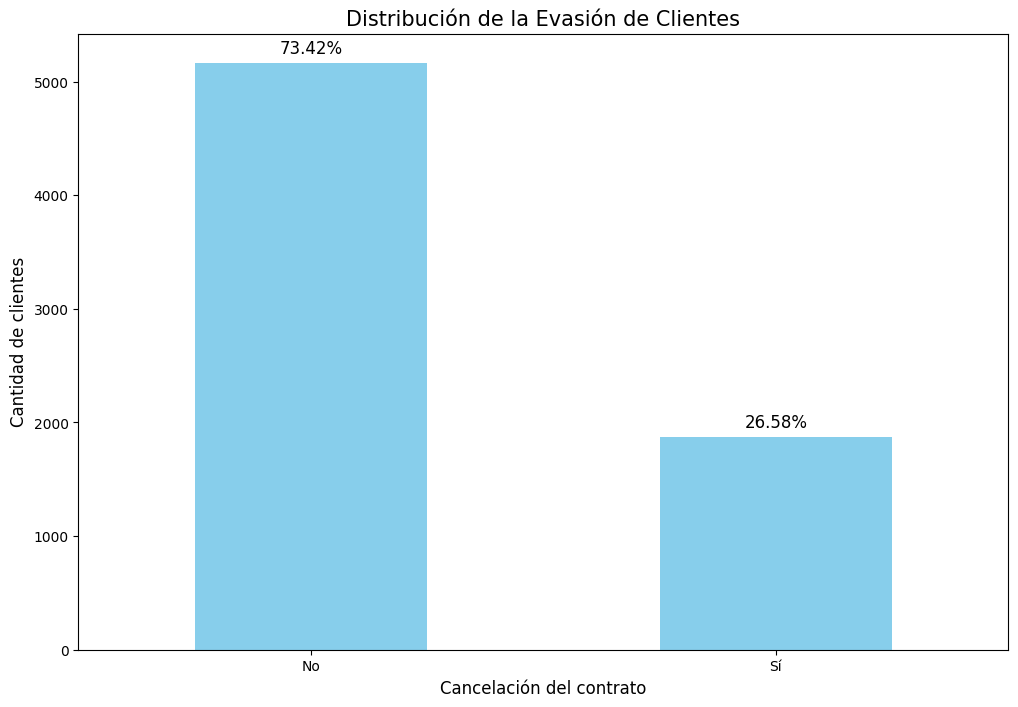

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))
cantidad.plot(kind = 'bar', color = 'skyblue')
plt.title('Distribución de la Evasión de Clientes', fontsize = 15)
plt.xlabel('Cancelación del contrato', fontsize = 12)
plt.ylabel('Cantidad de clientes', fontsize = 12)
plt.xticks(rotation=0)

for i, j in enumerate(porcentajes):
    plt.text(i, cantidad.iloc[i] + 50, f'{j}%', ha='center', va='bottom', fontsize = 12)

plt.show()

In [29]:
evasion_genero = pd.crosstab(datos_df['genero'], datos_df['evasión'])
evasion_genero

evasión,No,Sí
genero,,
Femenino,2544,939
Masculino,2619,930


In [30]:
porcentaje_eg = round(((evasion_genero.div(evasion_genero.sum(axis = 1), axis = 0))*100),2)
porcentaje_eg

evasión,No,Sí
genero,,
Femenino,73.04,26.96
Masculino,73.80,26.20


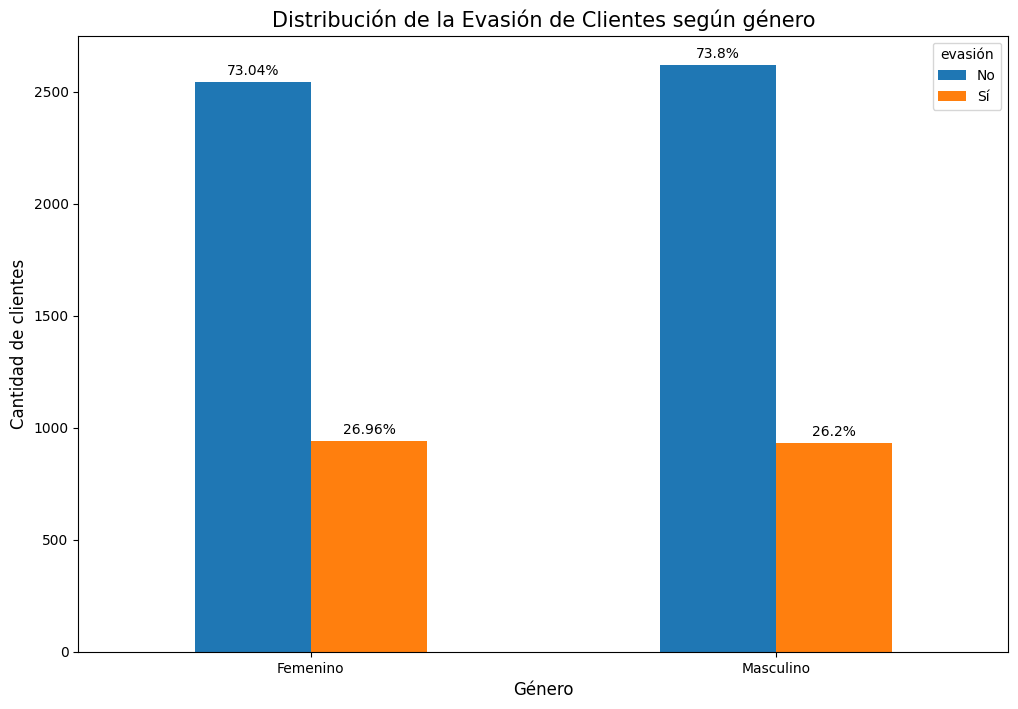

In [31]:
fig, ax = plt.subplots(figsize = (12,8))
ax = evasion_genero.plot(kind = 'bar', stacked = False, ax = ax)

plt.title('Distribución de la Evasión de Clientes según género', fontsize = 15)
plt.xlabel('Género', fontsize = 12)
plt.ylabel('Cantidad de clientes', fontsize = 12)
plt.xticks(rotation=0)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, labels=[f'{v}%' for v in porcentaje_eg.iloc[:, i]], padding=3)

plt.show()

In [32]:
evasion_tcontrato = pd.crosstab(datos_df['tipo_contrato'], datos_df['evasión'])
evasion_tcontrato = evasion_tcontrato.reindex(['Mensual', 'Bienal', 'Anual'])
evasion_tcontrato

evasión,No,Sí
tipo_contrato,,
Mensual,2220,1655
Bienal,1637,48
Anual,1306,166


In [33]:
porcentaje_etc = round(((evasion_tcontrato.div(evasion_tcontrato.sum(axis = 1), axis = 0))*100),2)
porcentaje_etc

evasión,No,Sí
tipo_contrato,,
Mensual,57.29,42.71
Bienal,97.15,2.85
Anual,88.72,11.28


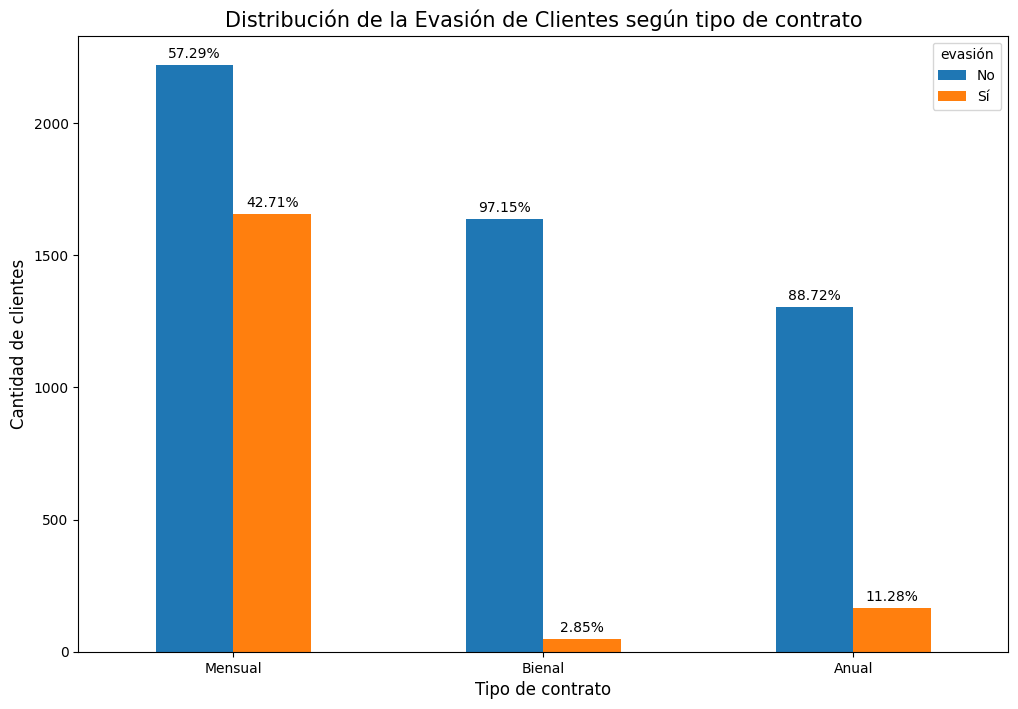

In [34]:
fig, ax = plt.subplots(figsize = (12,8))
ax = evasion_tcontrato.plot(kind = 'bar', stacked = False, ax = ax)

plt.title('Distribución de la Evasión de Clientes según tipo de contrato', fontsize = 15)
plt.xlabel('Tipo de contrato', fontsize = 12)
plt.ylabel('Cantidad de clientes', fontsize = 12)
plt.xticks(rotation=0)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, labels=[f'{v}%' for v in porcentaje_etc.iloc[:, i]], padding=3)

plt.show()

In [35]:
evasion_mpago = pd.crosstab(datos_df['metodo_pago'], datos_df['evasión'])
evasion_mpago = evasion_mpago.reindex(['Cheque electrónico', 'Cheque enviado por correo', 'Transferencia bancaria (automático)', 'Tarjeta de crédito (automático)'])
evasion_mpago

evasión,No,Sí
metodo_pago,,
Cheque electrónico,1294,1071
Cheque enviado por correo,1296,308
Transferencia bancaria (automático),1284,258
Tarjeta de crédito (automático),1289,232


In [36]:
porcentaje_emp = round(((evasion_mpago.div(evasion_mpago.sum(axis = 1), axis = 0))*100),2)
porcentaje_emp

evasión,No,Sí
metodo_pago,,
Cheque electrónico,54.71,45.29
Cheque enviado por correo,80.80,19.20
Transferencia bancaria (automático),83.27,16.73
Tarjeta de crédito (automático),84.75,15.25


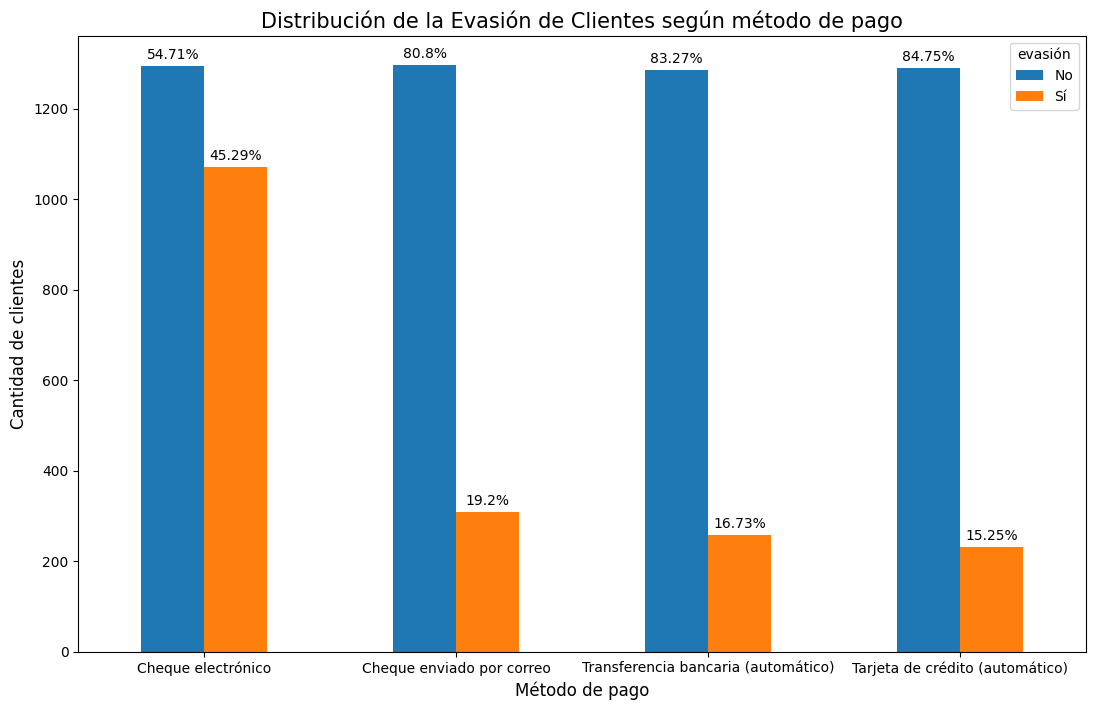

In [37]:
fig, ax = plt.subplots(figsize = (13,8))
ax = evasion_mpago.plot(kind = 'bar', stacked = False, ax = ax)

plt.title('Distribución de la Evasión de Clientes según método de pago', fontsize = 15)
plt.xlabel('Método de pago', fontsize = 12)
plt.ylabel('Cantidad de clientes', fontsize = 12)
plt.xticks(rotation=0)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, labels=[f'{v}%' for v in porcentaje_emp.iloc[:, i]], padding=3)

plt.show()

In [38]:
evasion_tinternet = pd.crosstab(datos_df['tipo_internet'], datos_df['evasión'])
evasion_tinternet

evasión,No,Sí
tipo_internet,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [39]:
porcentaje_eti = round(((evasion_tinternet.div(evasion_tinternet.sum(axis = 1), axis = 0))*100),2)
porcentaje_eti

evasión,No,Sí
tipo_internet,,
DSL,81.00,19.00
Fiber optic,58.11,41.89
No,92.57,7.43


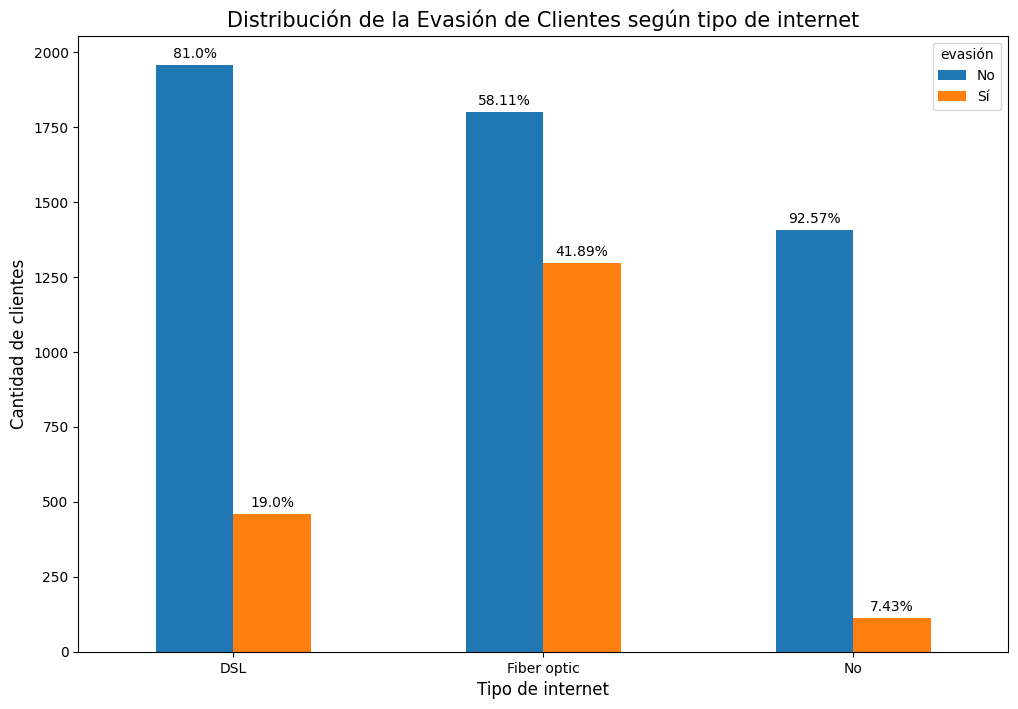

In [40]:
fig, ax = plt.subplots(figsize = (12,8))
ax = evasion_tinternet.plot(kind = 'bar', stacked = False, ax = ax)

plt.title('Distribución de la Evasión de Clientes según tipo de internet', fontsize = 15)
plt.xlabel('Tipo de internet', fontsize = 12)
plt.ylabel('Cantidad de clientes', fontsize = 12)
plt.xticks(rotation=0)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, labels=[f'{v}%' for v in porcentaje_eti.iloc[:, i]], padding=3)

plt.show()

In [41]:
evasion_ticontrato = pd.crosstab(datos_df['tiempo_contrato_meses'], datos_df['evasión'])
evasion_ticontrato

evasión,No,Sí
tiempo_contrato_meses,,
1,233,380
2,115,123
3,106,94
4,93,83
5,69,64
...,...,...
68,91,9
69,87,8
70,108,11


In [42]:
porcentaje_etic = round(((evasion_ticontrato.div(evasion_ticontrato.sum(axis = 1), axis = 0))*100),2)
porcentaje_etic

evasión,No,Sí
tiempo_contrato_meses,,
1,38.01,61.99
2,48.32,51.68
3,53.00,47.00
4,52.84,47.16
5,51.88,48.12
...,...,...
68,91.00,9.00
69,91.58,8.42
70,90.76,9.24


In [ ]:
ax.set_xticks(range(0, len(evasion_ticontrato), 3))  # mostrar cada 3 meses
ax.set_xticklabels(range(1, 73, 3))

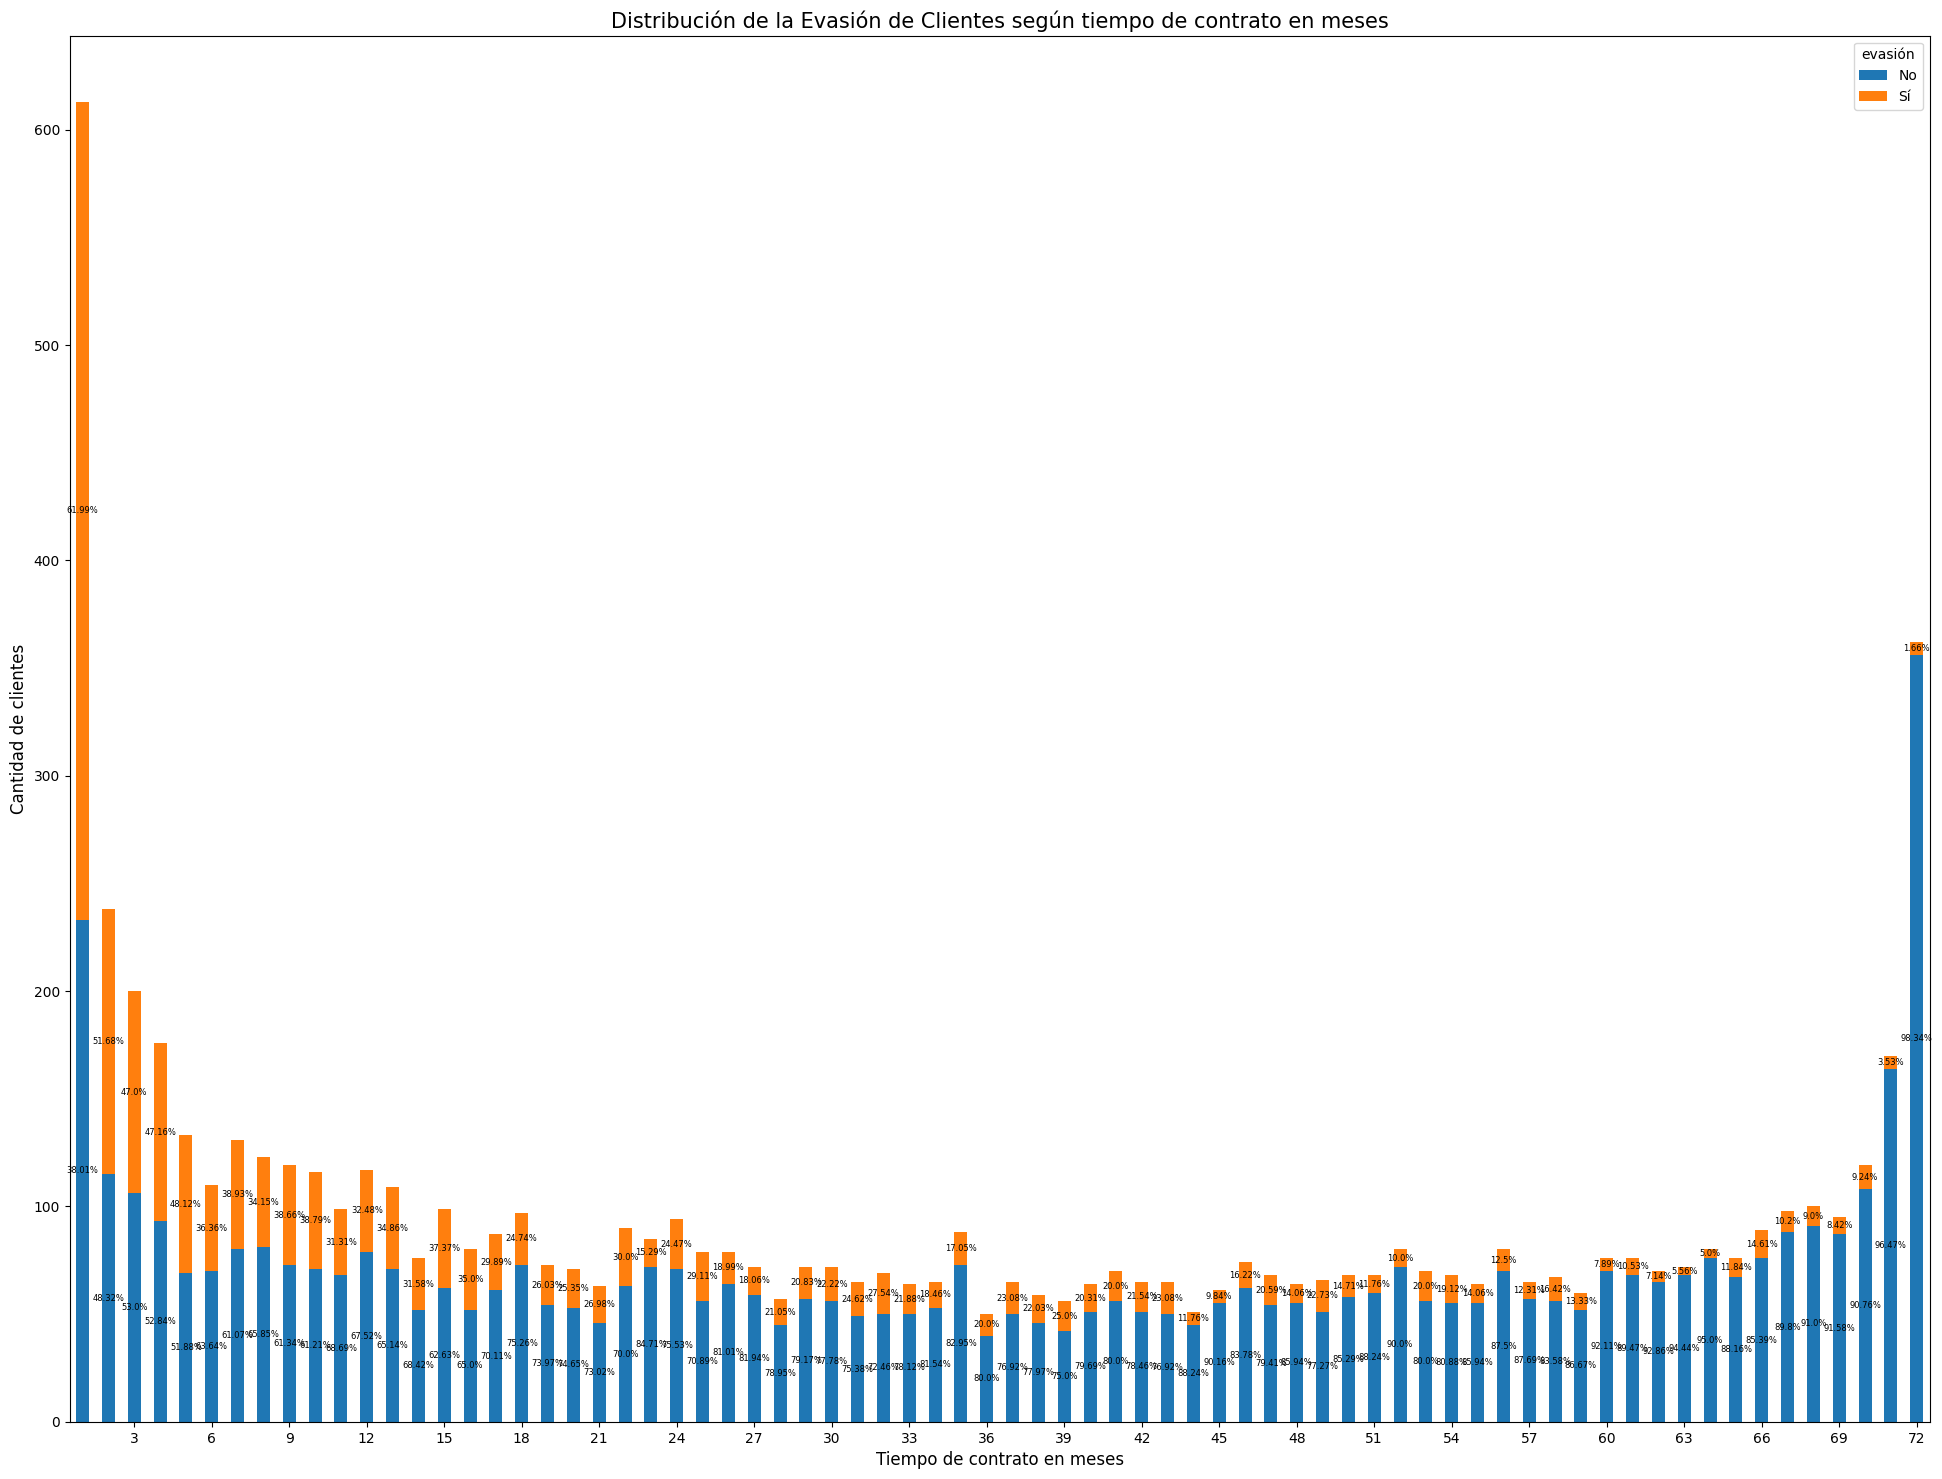

In [72]:
fig, ax = plt.subplots(figsize = (24, 18))
ax = evasion_ticontrato.plot(kind = 'bar', stacked = True, ax = ax)

ax.set_xticks(range(2, len(evasion_ticontrato), 3))  # mostrar cada 3 meses

plt.title('Distribución de la Evasión de Clientes según tiempo de contrato en meses', fontsize = 15)
plt.xlabel('Tiempo de contrato en meses', fontsize = 12)
plt.ylabel('Cantidad de clientes', fontsize = 12)
plt.xticks(rotation=0)

for i, container in enumerate(ax.containers):
    ax.bar_label(container, labels=[f'{v}%' for v in porcentaje_etic.iloc[:, i]], fontsize = 6, label_type = 'center')

plt.show()

In [103]:
evasion_ftotal = datos_df.pivot_table(index = datos_df.evasión, columns = 'tiempo_contrato_meses', values= 'facturacion_total', aggfunc = 'sum')
evasion_ftotal


tiempo_contrato_meses,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
evasión,,,,,,,,,,,,,,,,,,,,,
No,8832.8,11039.7,16126.4,16974.9,17664.10,18985.05,28100.9,31398.55,37692.85,32495.70,...,308675.85,367751.05,340871.50,362062.0,406616.45,440145.05,408120.50,561693.85,849964.20,2061870.2
Sí,22115.0,16171.4,18811.6,23598.5,22833.25,17994.20,26708.3,25524.50,29439.95,36377.55,...,25829.10,20785.80,55815.45,85567.4,67731.65,60484.95,55103.45,74843.95,40595.45,42234.9


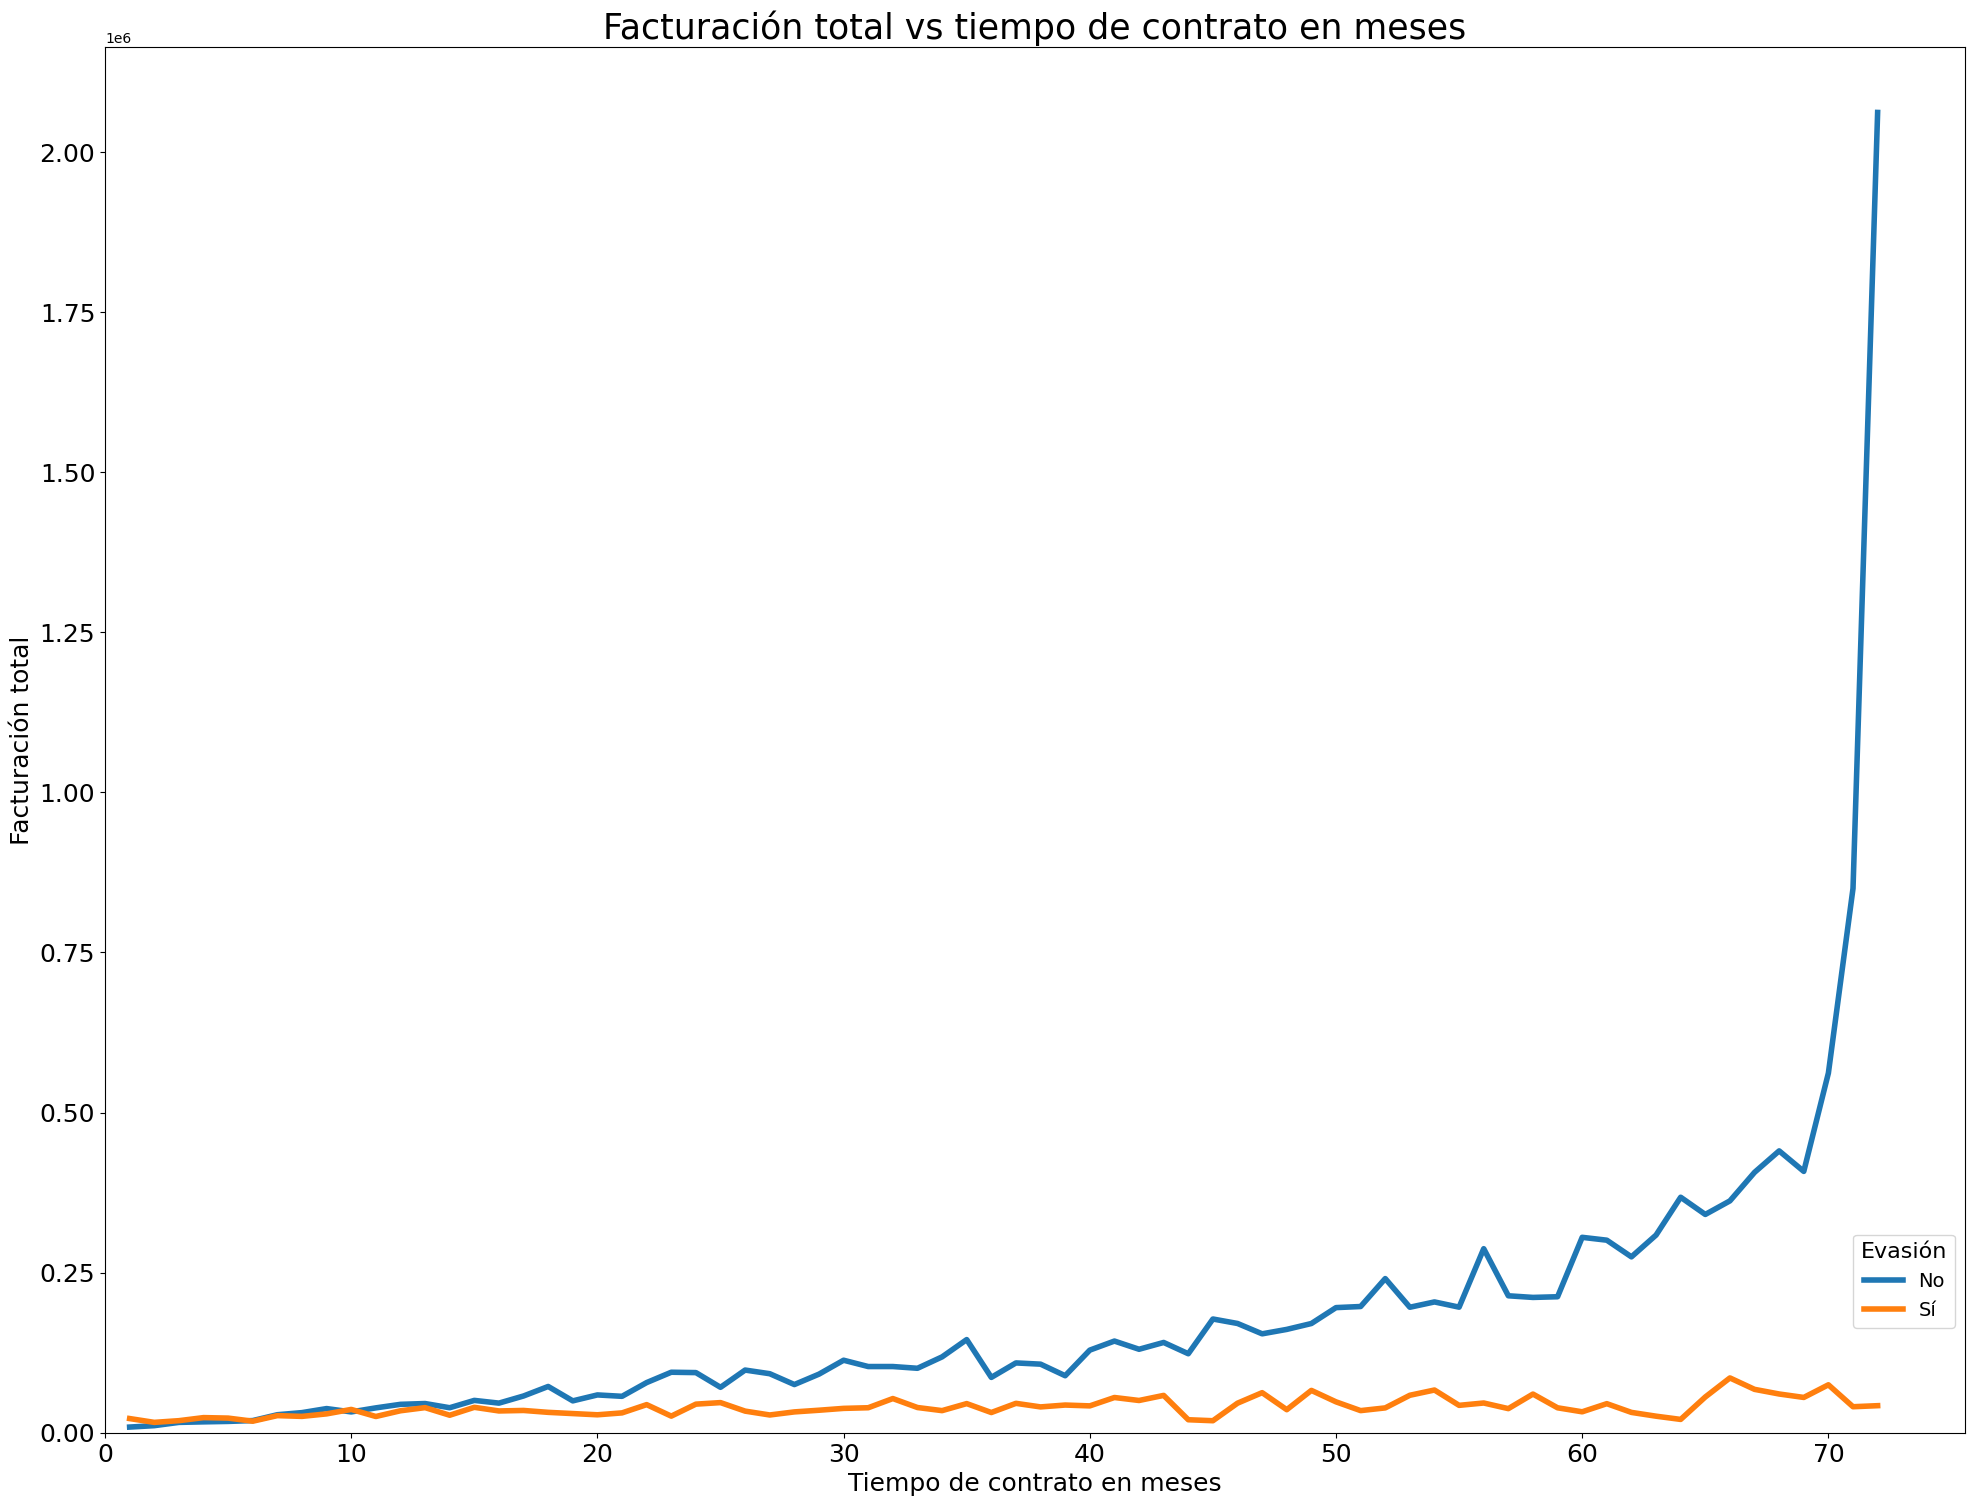

In [99]:
plt.figure(figsize = (24, 18))
plt.plot(evasion_ftotal.columns, evasion_ftotal.loc['No'], label = 'No', lw = 4)
plt.plot(evasion_ftotal.columns, evasion_ftotal.loc['Sí'], label = 'Sí', lw = 4)

plt.title('Facturación total vs tiempo de contrato en meses', fontsize = 25)
plt.xlabel('Tiempo de contrato en meses', fontsize = 18)
plt.ylabel('Facturación total', fontsize = 18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.legend(title = 'Evasión', bbox_to_anchor = (1, 0.15), fontsize = 14, title_fontsize = 16)
plt.show()

#📄Informe final

### **Introducción**

El objetivo del análisis de los datos de la empresa Telecom X es comprender cuáles son los factores que llevan a la pérdida de clientes.

### **Limpieza y tratamiento de datos**

Se importó los datos desde formato json.  
Se verificó la existencia de valores únicos, valores duplicados, valores nulos y valores vacíos o en blanco.  
Se convirtieron los datos de la columna inicialmente denominada account.Charges.Total de tipo object a tipo float.  
Se eliminaron las filas cuyos valores en las columnas, inicialmente denominadas Churn y account.Charges.Total, eran vacíos o nulos.  
Nuevamente se verificó la existencia de valores nulos y vacíos o en blanco.  
Se renombró las columnas de inglés a español.  
Se transformaron los datos de la columna tiene_+60 de (0, 1) a (No, Sí).  
Se transformaron los datos dentro de datos_df de inglés a español.

### **Análisis exploratorio de datos**

El gráfico de Distribución de la Evasión de clientes refleja que el 26.53% del total de clientes deciden cancelar su contrato con Telecom X, mientras que 73.42% decide continuar su contrato.  
El gráfico de distribución de evasión de clientes según género refleja que el género no es un factor influyente sobre la evasión de clientes.  
El gráfico de Distribución de la Evasión de Clientes según tipo de contrato indica que el tipo de contrato mensual influye notablemente sobre la evasión de clientes, encontrando que el 42.71% de los que optaron por este tipo de contratación decidieron cancelar su contato.  
El gráfico de Distribución de la Evasión de Clientes según método de pago indica que el tipo de método de pago cheque electrónico influye claramente sobre la evasión de clientes, encontrando que el 45.29% de los que optaron por este tipo de método de pago decidieron cancelar su contrato.  
El gráfico de Distribución de la Evasión de Clientes según tipo de internet indica que el tipo de internet de Fibra óptica influye sobre la evasión de clientes, encontrando que el 41.89% de los que optaron por este tipo de internet decidieron cancelar su contrato.  
El gráfico de Distribución de la Evasión de Clientes según tipo de internet indica que el tipo de internet de Fibra óptica influye sobre la evasión de clientes, encontrando que el 41.89% de los que optaron por este tipo de internet decidieron cancelar su contrato.  
El gráfico de Distribución de la Evasión de Clientes según tiempo de contrato indica que en los primeros 17 meses de contrato se encuentran la mayor cantidad de cancelaciones, pues el 25% de clientes que decidieron permanecer hasta el mes 17 decidieron cancelar su contrato y el 61.99% de clientes que decidieron permanecer al menos un mes decidieron dar por terminado su contrato.  


### **Conclusiones e Insights**

Los factores tipo de contrato mensual, tipo de método de pago cheque electrónico, tipo de servicio de internet de Fibra óptica y tiempo de contratación menor a 17 meses influyen notablemente sobre la evasión de clientes

### **Recomendaciones**

Se recomienda recoger información cualitativa mediante encuestas u otras herramientas para saber que está disgustando a los clientes que escogen tipo de contrato mensual, tipo de método de pago cheque electrónico, tipo de servicio de internet de Fibra óptica  y/o tiempo de contratación menor a 17 meses para hacer los ajustes necesarios en estos factores.